In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq

In [2]:
%matplotlib widget

Index(['% Time (s)', ' Channel A (Input 1) (V)', ' Channel B (Input 2) (V)'], dtype='object')


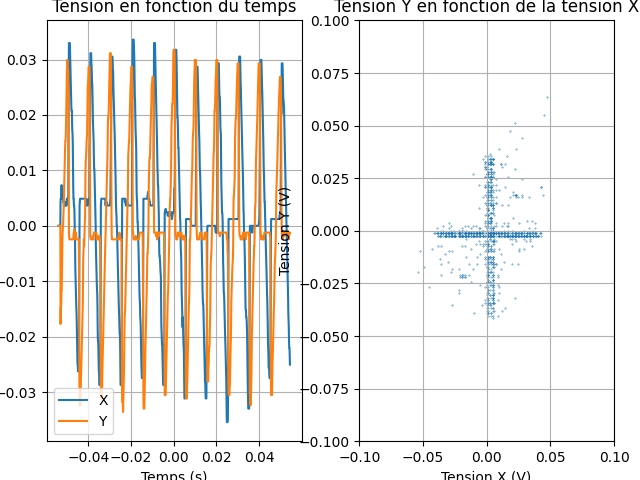

In [3]:
measures = 'measures2/eddy/channel_A_B_parallele_20230928_121640_Traces.csv'
# header is every line with % except the last one
first_measure = pd.read_csv(measures, header=8)
fig, ax = plt.subplots(1, 2)
fig.tight_layout()
print(first_measure.columns)
def median_filter(signal, window_size):
    filtered = np.zeros(len(signal))
    for i in range(window_size, len(signal)):
        filtered[i] = np.median(signal[i-window_size:i])
    return filtered

t = np.array(first_measure[first_measure.columns[0]])
X = np.array(first_measure[first_measure.columns[1]])
Y = np.array(first_measure[first_measure.columns[2]])
ax[0].plot(t, median_filter(X, 10))
ax[0].plot(t, median_filter(Y, 10))
ax[0].set_xlabel('Temps (s)')
ax[0].set_ylabel('Tension (V)')
ax[0].set_title('Tension en fonction du temps')
ax[0].legend(['X', 'Y'])
ax[1].scatter(X, Y, s = 0.1)
ax[1].set_xlabel('Tension X (V)')
ax[1].set_ylabel('Tension Y (V)')
ax[1].set_title('Tension Y en fonction de la tension X')
ax[1].set_xlim(-0.1, 0.1)
ax[1].set_ylim(-0.1, 0.1)
for i in range(2):
    ax[i].grid()

Index(['% Time (s)', ' Channel B (Input 2) (V)'], dtype='object')


Text(0, 0.5, 'Amplitude')

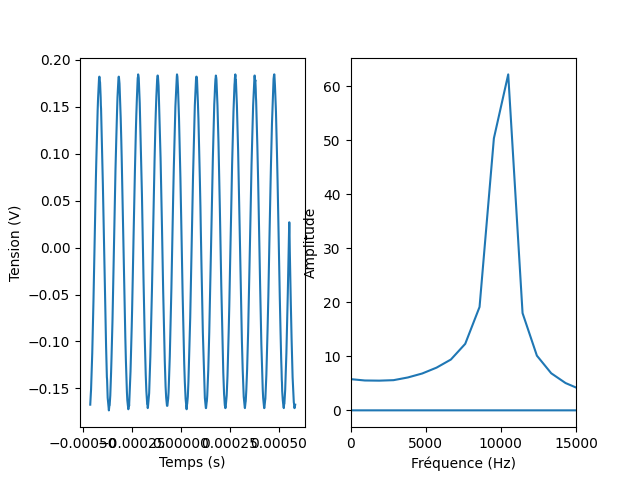

In [4]:
measures = 'measures2/eddy/frequency_20230928_121002_Traces.csv'
# header is every line with % except the last one
first_measure = pd.read_csv(measures, header=8)
fig, ax = plt.subplots(1, 2)
print(first_measure.columns)
t = np.array(first_measure[first_measure.columns[0]])
y = np.array(first_measure[first_measure.columns[1]])

ax[0].plot(t, y)
ax[1].plot(fftfreq(len(t), t[1]-t[0]), np.abs(fft(y)))
ax[1].set_xlim(0, 15000)
ax[0].set_xlabel('Temps (s)')
ax[0].set_ylabel('Tension (V)')
ax[1].set_xlabel('Fréquence (Hz)')
ax[1].set_ylabel('Amplitude')

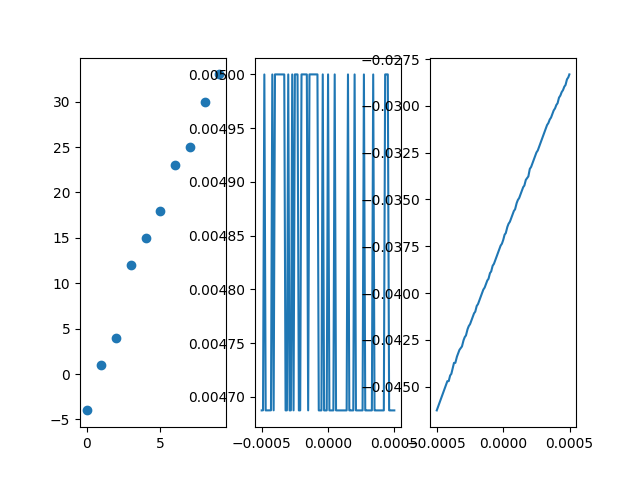

In [8]:
array_plastique = [-4, 1, 4, 12, 15, 18, 23, 25, 30, 33]
fig, ax = plt.subplots(1, 3)
ax[0].plot(array_plastique, 'o')
centers_X = []
centers_Y = []
for i in range(1,2 ):
    measures = 'measures/k{}.csv'.format(i)
    measures = pd.read_csv(measures, header=1)
    t = np.array(measures[measures.columns[0]])
    X = np.array(measures[measures.columns[1]])
    Y = np.array(measures[measures.columns[2]])
    centers_X.append(np.mean(X))
    centers_Y.append(np.mean(Y))
    ax[1].plot(t, X)
    ax[2].plot(t, Y)